# **Chennai Water Storage Manager**
------
*Notebook for TARP project collaborated by Senthil Kumar and Somya Sheti*


## **STEP ZERO: IMPORT LIBRARIES AND MINE DATA**
-------
- Import necessary libraries
- Web-scrap data

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from keras import layers
from keras import optimizers
import io
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
print('necessary libraries imported')

necessary libraries imported


In [ ]:
# Mining data from the website


# Writing to an excel  
# sheet using Python 
import xlwt 
from xlwt import Workbook 
  
# Workbook is created 
wb = Workbook() 
  
# add_sheet is used to create sheet. 
sheet1 = wb.add_sheet('Main_sheet') 
  
sheet1.write(0, 0, 'Date')
sheet1.write(0, 1, 'nth day in year')
 
sheet1.write(0, 2, 'Storage (mcft)') 
sheet1.write(0, 3, 'Inflow (cusecs)') 
sheet1.write(0, 4, 'Rainfall (mm)') 
sheet1.write(0, 5, 'Outflow (cusecs)')
sheet1.write(0,6, 'Reservoir')
 
required_td=[14,15,17,16,23,24,26,25,32,33,35,34,50,51,53,52]
content=''
controller=1
 
import requests
#with open('C:\Users\R. Senthil Kumar\AppData\Local\Programs\Python\Python38-32\content.txt', 'r') as content_file:
  #  content = content_file.read()
from datetime import datetime  
from datetime import timedelta  
def findoccurence(n):
    global content
    position=0
    for i in range(0,n):
        temp=content[content.find('<td ',position):content.find('</td>',position)]
        #print(temp)
        temp=temp[temp.rfind('>',0,temp.find('</font>')-1)+1:temp.find('</font>')]
        #(temp)
        
        position=content.find('</td>',position)+1
    try:
      float(temp)
      return temp
    except:
      return -1
 
 
sdate=input('Enter starting date in dd/mm/yyyy format: ')
edate=input('Enter ending date in dd/mm/yyyy format: ')
x=datetime.strptime(sdate,'%d/%m/%Y')
y=datetime.strptime(edate,'%d/%m/%Y')
y+=timedelta(days=1)
edate=y.strftime("%d")+'/'+y.strftime("%m")+'/'+y.strftime("%Y")
stringer=x.strftime("%d")+'/'+x.strftime("%m")+'/'+x.strftime("%Y")
print('Deploying SPYder, please wait...\n(do not disconnect the net-connection or abort the process)\n')
while(stringer!=edate):
    print('current SPYder rezendevous: '+stringer)
    diff=(x-datetime(int(x.strftime("%Y")),1,1)).days
    sheet1.write(controller,0,stringer)
    sheet1.write(controller,1,diff)
    pointer=2
    parameters = {'ldate':stringer}
    r = requests.post('http://123.63.203.150/reserve.asp', data=parameters)
    content=r.text
    origin=1
    for i in required_td:
        #print(controller,pointer,float(findoccurence(i)))
        sheet1.write(controller,pointer,float(findoccurence(i)))
        pointer+=1
        if((pointer-1)%5==0):
            sheet1.write(controller,pointer,origin)
            origin+=1
            if(origin==5):
                break
            else:
                controller+=1
                sheet1.write(controller,0,stringer)
                sheet1.write(controller,1,diff)
                pointer=2
        
    x+=timedelta(days=1)
    stringer=x.strftime("%d")+'/'+x.strftime("%m")+'/'+x.strftime("%Y")
    controller+=1
 
wb.save('reservoir_new.xls')
print('SPYder deploy success, please open reservoir.xls sheet in your local folder\n')


SyntaxError: ignored

In [ ]:
dictionary={
    'Chembarambaakam':0,
    'Chozhavaram':1,
    'Poondi':2,
    'RedHills':3
}
revdict={
   
    0:'Chembarambaakam',
    1:'Chozhavaram',
    2:'Poondi',
    3:'RedHills'
}
dianna=[]
    
dianna.append(pd.read_csv('./CHdianna2.csv',na_values=-1))
dianna.append(pd.read_csv('./CZdianna2.csv',na_values=-1))
dianna.append(pd.read_csv('./PNdianna2.csv',na_values=-1))
dianna.append(pd.read_csv('./RHdianna2.csv',na_values=-1))
for i in range(0,4):
    print('\n',revdict[i],':\n')
    dianna[i]=dianna[i].reset_index(drop=True)
    print(dianna[i].tail())


 Chembarambaakam :

            Date  nth day in year  ...  Rainfall (mm)  Outflow (cusecs)
5839  27/12/2019              360  ...            0.0              67.0
5840  28/12/2019              361  ...            0.0              67.0
5841  29/12/2019              362  ...            0.0              67.0
5842  30/12/2019              363  ...            0.0              67.0
5843  31/12/2019              364  ...           13.0              67.0

[5 rows x 6 columns]

 Chozhavaram :

            Date  nth day in year  ...  Rainfall (mm)  Outflow (cusecs)
5839  27/12/2019              360  ...            0.0              75.0
5840  28/12/2019              361  ...            0.0              70.0
5841  29/12/2019              362  ...            0.0              35.0
5842  30/12/2019              363  ...           14.0              23.0
5843  31/12/2019              364  ...            4.0              12.0

[5 rows x 6 columns]

 Poondi :

            Date  nth day in year  ...  Ra

## **STEP ONE**: Exploratory Data Analysis
------
Note that we have mined the data from the website. Hence, the dataset is prone to noise. Here we do the following:
- Null value statistics
- Reservoir storage trend versus date
- Correlation of each attribute with respect to storage

In [ ]:
print('Dataset information: ')
for i in range(len(dianna)):
  print(revdict[i],'\n',dianna[i].isnull().sum(),'\n')

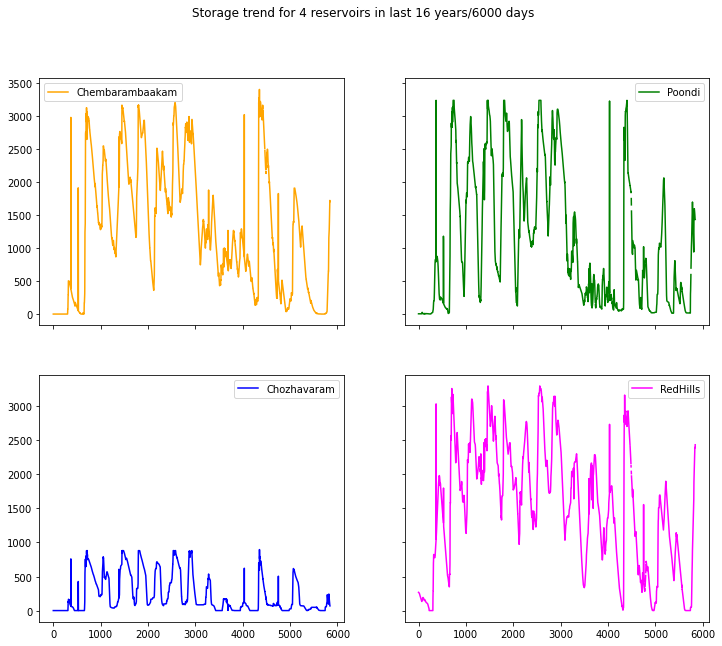

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(12,10),sharex='col', sharey='row')
ax[0,0].plot(dianna[0]['Storage (mcft)'],color='orange',label=revdict[0])
ax[0,0].legend()
ax[0,1].plot(dianna[2]['Storage (mcft)'],color='g',label=revdict[2])
ax[0,1].legend()
ax[1,0].plot(dianna[1]['Storage (mcft)'],color='blue',label=revdict[1])
ax[1,0].legend()
ax[1,1].plot(dianna[3]['Storage (mcft)'],color='magenta',label=revdict[3])
ax[1,1].legend()

fig.suptitle('Storage trend for 4 reservoirs in last 16 years/6000 days')
fig.show()

Storage trend in Chembarambaakam


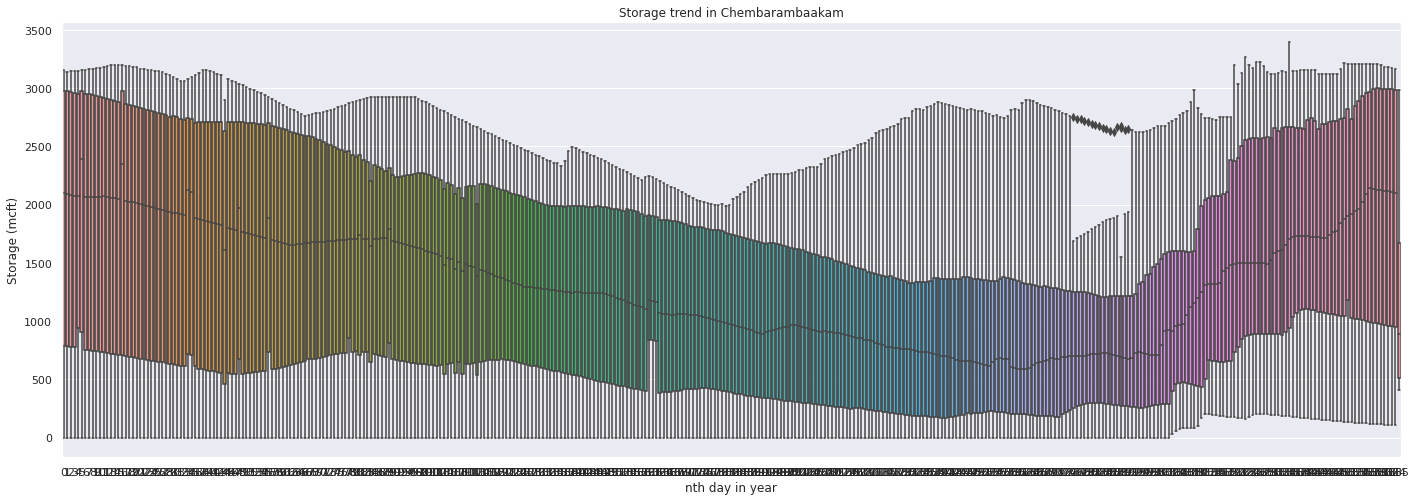

Storage trend in Chozhavaram


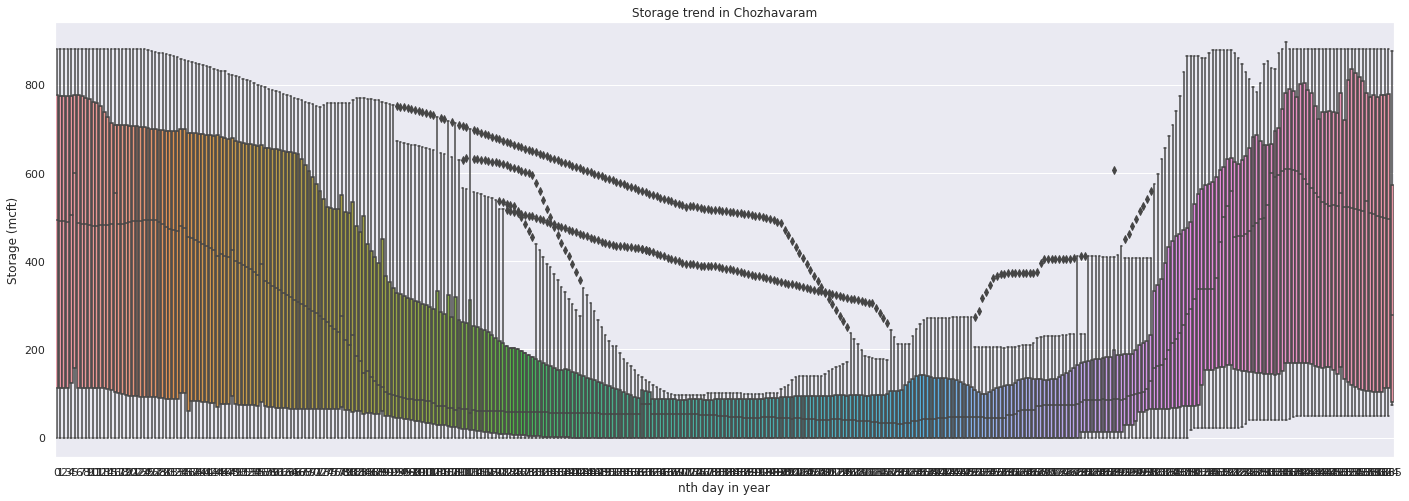

Storage trend in Poondi


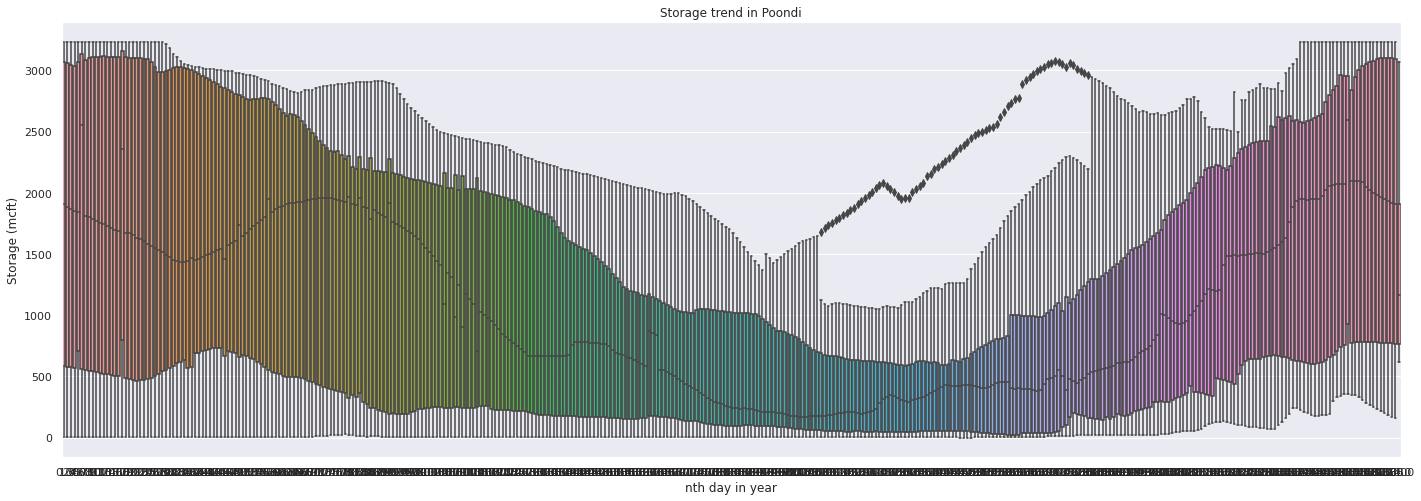

Storage trend in RedHills


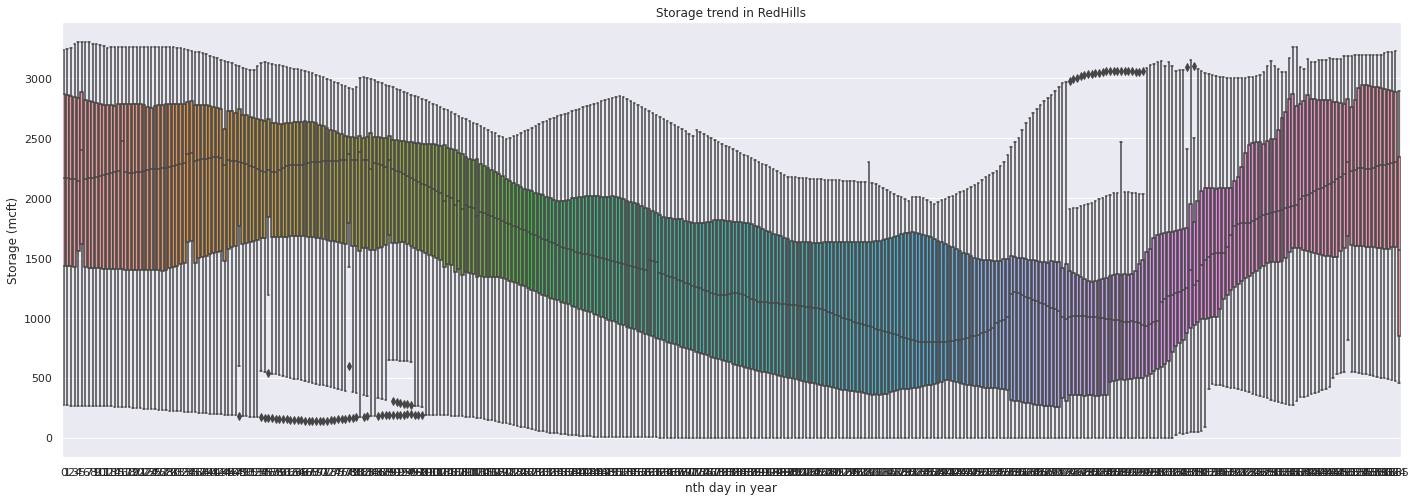

In [ ]:
for i in range(4):
  sns.set(rc={'figure.figsize':(24,8)})
  print("Storage trend in "+revdict[i])
  sns.boxplot(x="nth day in year", y="Storage (mcft)", data=dianna[i]).set_title("Storage trend in "+revdict[i])
  plt.show()

## **STEP TWO**: Data Cleaning
-------
Since we only deal with numbers, the data cleaning is null treatment. For simplicity reasons, we remove null values

In [ ]:
print('data cleaning')
for i in range(0,4):
    print('\n',revdict[i],' Null removal:\n')
    print(dianna[i].isnull().sum())
    dianna[i]=dianna[i].dropna().reset_index(drop=True)

data cleaning

 Chembarambaakam  Null removal:

Date                0
nth day in year     0
Storage (mcft)      0
Inflow (cusecs)     0
Rainfall (mm)       0
Outflow (cusecs)    0
dtype: int64

 Chozhavaram  Null removal:

Date                0
nth day in year     0
Storage (mcft)      0
Inflow (cusecs)     0
Rainfall (mm)       0
Outflow (cusecs)    0
dtype: int64

 Poondi  Null removal:

Date                0
nth day in year     0
Storage (mcft)      0
Inflow (cusecs)     0
Rainfall (mm)       0
Outflow (cusecs)    0
dtype: int64

 RedHills  Null removal:

Date                0
nth day in year     0
Storage (mcft)      0
Inflow (cusecs)     0
Rainfall (mm)       0
Outflow (cusecs)    0
dtype: int64


## **STEP THREE**: Feature engineering
-------
Our primary goal here is to convert a table of Storage-Inflow-Outflow-Rainfall to `sequence` of `LOOKBACK` dates that `target` the `LOOKFRONT` date as shown below:

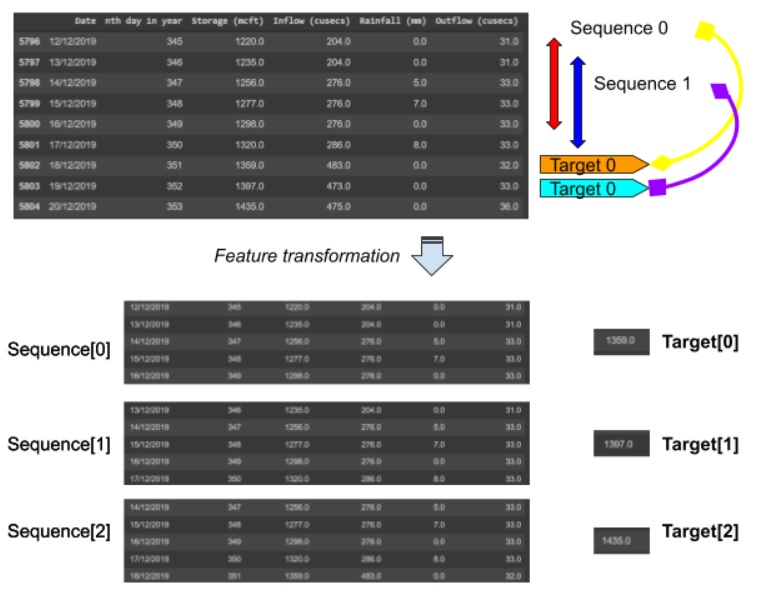
- Normalise dataset using min-max normalisation
- Sequence-transform data
- take only `TOTAL_DATES` for each dataset to ensure parallel training of model

In [ ]:
dianna[0].tail(20)

,Date,nth day in year,Storage (mcft),Inflow (cusecs),Rainfall (mm),Outflow (cusecs)
5796,12/12/2019,345,1220.0,204.0,0.0,31.0
5797,13/12/2019,346,1235.0,204.0,0.0,31.0
5798,14/12/2019,347,1256.0,276.0,5.0,33.0
5799,15/12/2019,348,1277.0,276.0,7.0,33.0
5800,16/12/2019,349,1298.0,276.0,0.0,33.0
5801,17/12/2019,350,1320.0,286.0,8.0,33.0
5802,18/12/2019,351,1359.0,483.0,0.0,32.0
5803,19/12/2019,352,1397.0,473.0,0.0,33.0
5804,20/12/2019,353,1435.0,475.0,0.0,36.0
5805,21/12/2019,354,1473.0,473.0,0.0,33.0


In [ ]:
LOOKBACK=14
LOOKFRONT=7

In [ ]:
#MIN-MAX NORMALISATION
def normaliser(data,ij):
                              siro=data.drop(columns=['Date'])
                              for i in siro.columns:
                                siro[i]-=min(dianna[ij][i])
                                siro[i]/=(max(dianna[ij][i])-min(dianna[ij][i]))
                              return siro
  



    


#N-DAY SEQUENCE FOR NEURAL NET
def sequence_prepare(raw,lookback=5,lookfront=1):
                                          sequence=np.zeros(((len(raw)-lookback),lookback,raw.shape[-1]))
                                          target=np.zeros(len(raw)-lookback)

                                          for i in range(lookback, len(raw)-lookfront):
                                              for j in range(0,lookback):
                                                  sequence[i-lookback][j]=raw.loc[i+j-lookback,:]
                                              target[i-lookback]=raw['Storage (mcft)'][i+lookfront]

                                          return sequence,target

def op_re_normaliser(var,ij):
              var*=(max(dianna[ij]['Storage (mcft)'])-min(dianna[ij]['Storage (mcft)']))
              var+=min(dianna[ij]['Storage (mcft)'])
              return var
            

siro=[]
sequence=[]
target=[]

for i in range(0,4):
    print(revdict[i])
    siro.append(normaliser(dianna[i],i))
    print(siro[i].describe())

    sequ,targ=sequence_prepare(siro[i],LOOKBACK,LOOKFRONT)
    sequence.append(sequ)
    target.append(targ)  

TOTAL_DATES=5810-LOOKBACK

for i in range(0,4):
     sequence[i]=sequence[i][:TOTAL_DATES]
     target[i]=target[i][:TOTAL_DATES]
     
     print(sequence[i].shape,
        target[i].shape)

Chembarambaakam
       nth day in year  Storage (mcft)  ...  Rainfall (mm)  Outflow (cusecs)
count      5816.000000     5816.000000  ...    5816.000000       5816.000000
mean          0.498997        0.378998  ...       0.008421          0.003948
std           0.288959        0.284045  ...       0.034169          0.020659
min           0.000000        0.000000  ...       0.000000          0.000000
25%           0.249315        0.120141  ...       0.000000          0.001207
50%           0.498630        0.351296  ...       0.000000          0.002690
75%           0.750685        0.602768  ...       0.000000          0.004034
max           1.000000        1.000000  ...       1.000000          1.000000

[8 rows x 5 columns]
Chozhavaram
       nth day in year  Storage (mcft)  ...  Rainfall (mm)  Outflow (cusecs)
count      5826.000000     5826.000000  ...    5826.000000       5826.000000
mean          0.499287        0.261594  ...       0.012861          0.021030
std           0.288760    

## **STEP FOUR**: Brain Building
-------

### **PIPELINE ONE**: LSTM network

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import layers

#model.add(layers.Reshape((1,5,4)))
#model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(layers.Flatten())`

xin=[]
lstm=[]
xout=[]
for i in range(0,4):
    xin.append(layers.Input(shape=(LOOKBACK,5),name=('Input'+str(i))))
    lstm.append(layers.LSTM(16,
                            dropout=0.1,
                            recurrent_dropout=0.5,
                            activation='relu',
                            #return_sequences=True,
                            #input_shape=(5,4)
                         name=('LSTM'+str(i)))(xin[i]))
    xout.append(layers.Dense(1,name=('out'+str(i)))(lstm[i]))

                
model=models.Model(inputs=xin,outputs=xout)
model.compile(loss='mae', optimizer=optimizers.Adam())
model.summary()

print('all done')

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input0 (InputLayer)             [(None, 14, 5)]      0                                            
__________________________________________________________________________________________________
Input1 (InputLayer)             [(None, 14, 5)]      0                                            
__________________________________________________________________________________________________
Input2 (InputLayer)             [(None, 14, 5)]      0                                            
__________________________________________________________________________________________________
Input3 (InputLayer)             [(None, 14, 5)]      0                                            
______________________________________________________________________________________________

In [ ]:
fold=0
history=[]
for train_index, test_index in KFold(3,shuffle=True).split(sequence[0]):
    print(' Fold ',fold+1)
    x_train=[]
    x_val=[]
    y_train=[]
    y_val=[]
    for i in range(0,4):
      x_train.append(sequence[i][train_index])
      x_val.append(sequence[i][test_index])
      y_train.append(target[i][train_index])
      y_val.append(target[i][test_index])
    history.append(model.fit(x_train, y_train, 
                    epochs=100, 
                    batch_size=500, 
                    validation_data=(x_val, y_val)))

 Fold  1
Epoch 1/100
8/8 [==============================] - 15s 469ms/step - loss: 1.3275 - out0_loss: 0.3649 - out1_loss: 0.3552 - out2_loss: 0.2363 - out3_loss: 0.3711 - val_loss: 1.2073 - val_out0_loss: 0.3095 - val_out1_loss: 0.3275 - val_out2_loss: 0.2084 - val_out3_loss: 0.3619
Epoch 2/100
8/8 [==============================] - 3s 321ms/step - loss: 1.0871 - out0_loss: 0.2879 - out1_loss: 0.2959 - out2_loss: 0.1927 - out3_loss: 0.3106 - val_loss: 0.9918 - val_out0_loss: 0.2427 - val_out1_loss: 0.2751 - val_out2_loss: 0.1780 - val_out3_loss: 0.2959
Epoch 3/100
8/8 [==============================] - 3s 316ms/step - loss: 0.8865 - out0_loss: 0.2284 - out1_loss: 0.2431 - out2_loss: 0.1681 - out3_loss: 0.2469 - val_loss: 0.8005 - val_out0_loss: 0.1909 - val_out1_loss: 0.2273 - val_out2_loss: 0.1572 - val_out3_loss: 0.2251
Epoch 4/100
8/8 [==============================] - 3s 328ms/step - loss: 0.7282 - out0_loss: 0.1823 - out1_loss: 0.1938 - out2_loss: 0.1465 - out3_loss: 0.2056 - val

In [ ]:

fig, axes = plt.subplots(3, 4, figsize=(18,12))
for fold in range(0,3):
  for ij in range(0,4):

    axes[fold][ij].plot(history[fold].history['out'+str(ij)+'_loss'])
    axes[fold][ij].plot(history[fold].history['val_out'+str(ij)+'_loss'])
    axes[fold][ij].set_title(revdict[ij]+' Fold '+str(fold+1)+' model loss')
    axes[fold][ij].set_ylabel('loss') 
    axes[fold][ij].set_xlabel('epoch')
    
    axes[fold][ij].legend(['train', 'test'], loc='upper right')
fig.show()


### **PIPELINE TWO**: CNN network

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import layers

#model.add(layers.Reshape((1,5,4)))
#model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(layers.Flatten())`

xin=[]
cnnraw=[]
cnn=[]
xout=[]
for i in range(0,4):
    xin.append(layers.Input(shape=(LOOKBACK,5),name=('Input'+str(i))))
    cnnraw.append(layers.Conv1D(4,5,activation='relu',name=('CNN-base'+str(i)))(xin[i]))
    cnn.append(layers.Flatten(name=('CNN'+str(i)))(cnnraw[i]))
    xout.append(layers.Dense(1,name=('out'+str(i)))(cnn[i]))


                
model2=models.Model(inputs=xin,outputs=xout)
model2.compile(loss='mae', optimizer=optimizers.Adam())
model2.summary()

print('all done')

In [ ]:
fold=0
history=[]
for train_index, test_index in KFold(3,shuffle=True).split(sequence[0]):
    print(' Fold ',fold+1)
    x_train=[]
    x_val=[]
    y_train=[]
    y_val=[]
    for i in range(0,4):
      x_train.append(sequence[i][train_index])
      x_val.append(sequence[i][test_index])
      y_train.append(target[i][train_index])
      y_val.append(target[i][test_index])
    history.append(model2.fit(x_train, y_train, 
                    epochs=100, 
                    batch_size=500, 
                    validation_data=(x_val, y_val)))

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 4, figsize=(18,12))
for fold in range(0,3):
  for ij in range(0,4):

    axes[fold][ij].plot(history[fold].history['out'+str(ij)+'_loss'])
    axes[fold][ij].plot(history[fold].history['val_out'+str(ij)+'_loss'])
    axes[fold][ij].set_title(revdict[ij]+' Fold '+str(fold+1)+' model loss')
    axes[fold][ij].set_ylabel('loss') 
    axes[fold][ij].set_xlabel('epoch')
    
    axes[fold][ij].legend(['train', 'test'], loc='upper right')
fig.show()


## **STEP 5**: Model shortlisting

Here, we visualise models of all pipelines against the performance of test data (ie, performance of model on 2021 statistics)